## We have already covered this in 03-EDA.ipynb file . 

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(f'../dataset/raw/dataset.csv')

## 3. Data Preprocessing

### Impute missing values

In [10]:
# Identify numeric and binary columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
binary_cols = [col for col in data.columns if data[col].nunique() == 2 and data[col].dtype == 'int64']
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns with the mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Impute missing values in binary columns with the mode
data[binary_cols] = data[binary_cols].fillna(data[binary_cols].mode())

# Impute missing values in categorical columns with the mode
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode())

# Check if there are any missing values left
print("\nNumber of missing values after imputation:")
print(data.isnull().sum().sum())

# Display the first few rows of the dataset after imputation
print(data.head())


Number of missing values after imputation:
208
   EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0     5110001          0  35.0        Rarely  Analytics         5.0   
1     5110002          1  32.0           Yes      Sales         5.0   
2     5110003          0  31.0        Rarely  Analytics         5.0   
3     5110004          0  34.0           Yes      Sales        10.0   
4     5110005          0  37.0            No  Analytics        27.0   

  EducationField  Gender  HourlnWeek  Involvement  ...  JobSatisfaction ESOPs  \
0             CA    Male        69.0            1  ...                1     1   
1     Statistics  Female        62.0            4  ...                2     0   
2     Statistics       F        45.0            5  ...                2     1   
3     Statistics  Female        32.0            3  ...                4     1   
4     Statistics  Female        49.0            3  ...                4     1   

   NumCompaniesWorked  OverTime  Salar

### Number of outliers (using IQR method)

Number of outliers in the dataset: 1858


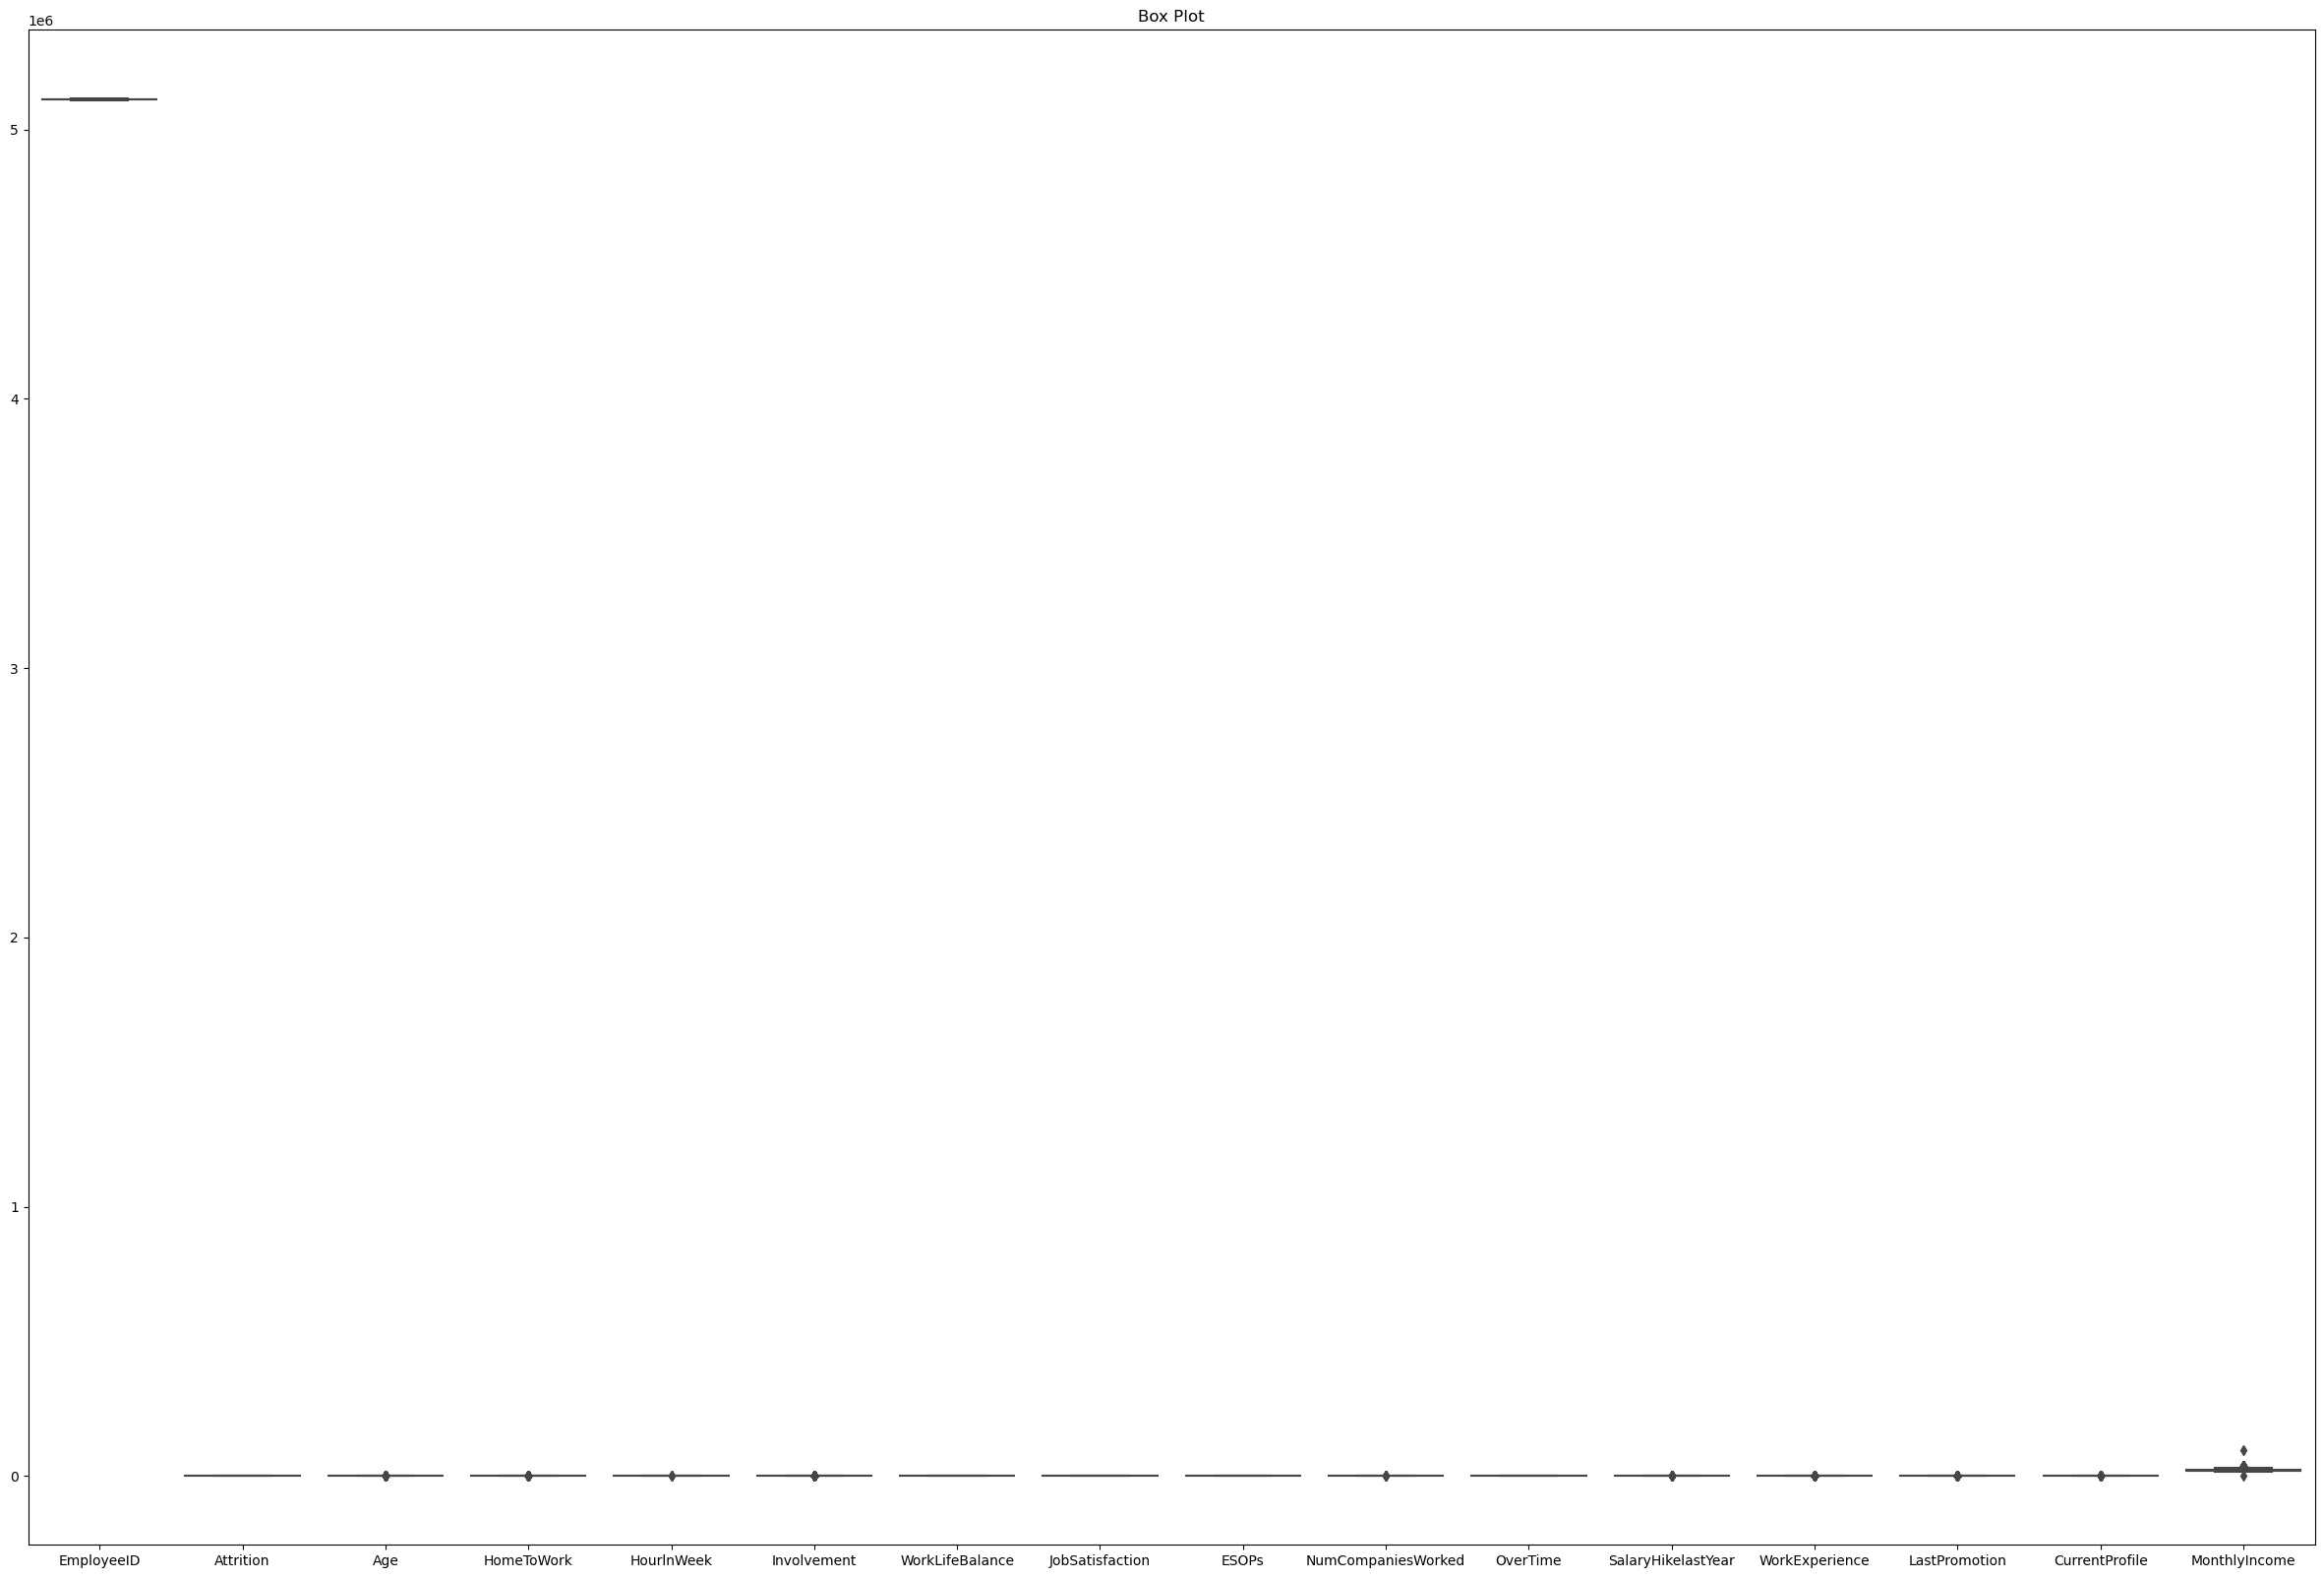

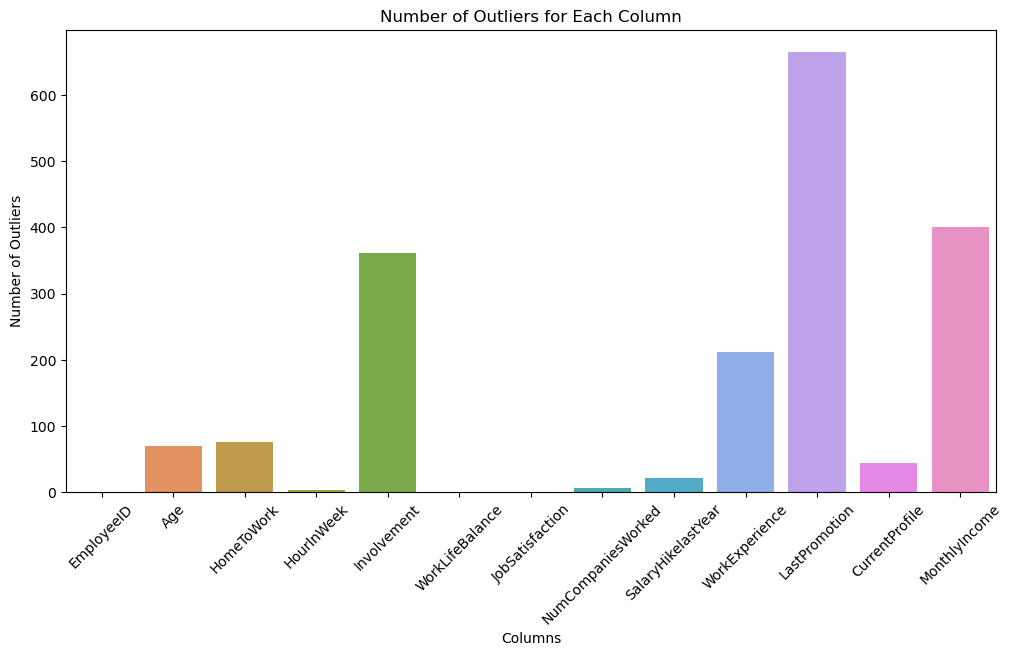

In [12]:
# Identify numeric columns, excluding binary columns
# When dealing with binary columns that have values 0 and 1, the typical methods for identifying outliers 
# (such as the IQR method) don't apply effectively. In these cases, outliers are generally not considered 
# because all values are valid representations of the data. Instead, we should focus on the numeric columns 
# where outliers can have a significant impact.
numeric_cols = [col for col in data.select_dtypes(include=[np.number]).columns if data[col].nunique() > 2]

# Calculate IQR for numerical columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers_mask = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count number of outliers for each column
outliers_count = outliers_mask.sum()

# Calculate the number of outliers
num_outliers = outliers_mask.sum().sum()

print(f"Number of outliers in the dataset: {num_outliers}")

# Optional: Display the outliers
outliers = data[outliers_mask.any(axis=1)]

plt.figure(figsize=(30, 20))
sns.boxplot(data=data)
plt.title("Box Plot")
plt.show()

# Plot the number of outliers for each column
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_count.index, y=outliers_count.values)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers for Each Column')
plt.show()

### Outlier treatment

In [13]:
# Remove outliers
data_witout_outlier = data[~outliers_mask.any(axis=1)]

print(f"Number of rows before removing outliers: {data.shape[0]}")
print(f"Number of rows after removing outliers: {data_witout_outlier.shape[0]}")

Number of rows before removing outliers: 5180
Number of rows after removing outliers: 3748


### Encode the  column

In [14]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,...,EducationField_Statistics,Gender_Female,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_M,MaritalStatus_Married,MaritalStatus_Single
0,5110001,0,35.0,5.0,69.0,1,1,1,1,1,...,0,0,1,1,0,0,0,1,0,0
1,5110002,1,32.0,5.0,62.0,4,3,2,0,8,...,1,1,0,1,0,0,0,0,0,1
2,5110003,0,31.0,5.0,45.0,5,3,2,1,3,...,1,0,0,0,1,0,0,0,0,1
3,5110004,0,34.0,10.0,32.0,3,2,4,1,1,...,1,1,0,0,1,0,0,0,0,0
4,5110005,0,37.0,27.0,49.0,3,4,4,1,8,...,1,1,0,0,1,0,0,0,0,0
